# Introduction to deep learning: handwritten digit recognition

This notebook provides examples of a neural network for image classification. We will do the following excercises:
- Handwritten digit recognition with fully connected network



# Exercise 1: Fully connected network for handwritten digit recognition

## Step 1: Load libraries

In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras import optimizers
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
print(tf.__version__) 

2.0.0


## Step 2: Load dataset

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9.

In [3]:
# first, we load a dataset of handwritten digits. The dataset consists of greyscale images. If you want to try RGB digit try this dataset: https://www.kaggle.com/prasunroy/synthetic-digits 
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
# Here, we download images (x) and labels (y)
# 60000 training set; 10000 test set
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

## Step 2.1: Explore the data

5


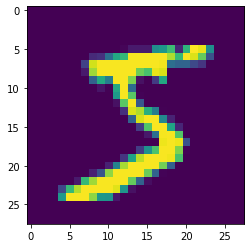

In [5]:
# Example of a picture
index = 0
plt.imshow(x_train[index])
print(y_train[index])

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [6]:
### Normalise images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0].shape

(28, 28)

## Step3: Build the model

We will use Keras sequential class: see documentation  [here](https://keras.io/api/models/ )

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

The Sequential model is a simple list of layers, but is limited to single-input, single-output stacks of layers. 

In [9]:
model = keras.models.Sequential([keras.layers.Flatten(), 
                                keras.layers.Dense(128, activation=tf.nn.relu),
                                keras.layers.Dense(10, activation=tf.nn.softmax)])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


We will use Adam optimization algorithm. Adam is a stochastic gradient descent method that computes individual adaptive learning rates for different parameters from estimates of first- and second-order moments of the gradients. [Read more here](https://www.tensorflow.org/swift/api_docs/Classes/Adam).

Reference: [“Adam: A Method for Stochastic Optimization”](https://arxiv.org/pdf/1412.6980v8.pdf) (Kingma and Ba, 2014).

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 4: Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [11]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2522 - accuracy: 0.9282
Epoch 2/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1097 - accuracy: 0.9673
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0761 - accuracy: 0.9769
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0578 - accuracy: 0.9822
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0447 - accuracy: 0.9865
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0348 - accuracy: 0.9893
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0288 - accuracy: 0.9911
Epoch 8/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0228 - accuracy: 0.9933
Epoch 9/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0191 - accuracy: 0.9942
Epoch 10/20
60000/60000 [=============================

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Step 5: Evaluate model performance

Next, compare how the model performs on the test dataset:

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/step

Test accuracy: 0.9786999821662903


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [14]:
classifications = model.predict(x_test)

print(classifications[0])

[1.6950527e-15 3.6914318e-16 2.9616297e-14 2.8689981e-11 2.2887978e-21
 4.9993353e-18 2.2343933e-24 1.0000000e+00 8.6006672e-16 2.9196732e-12]


In [15]:
print(y_test[0])

7


# Plot the training history

dict_keys(['loss', 'accuracy'])


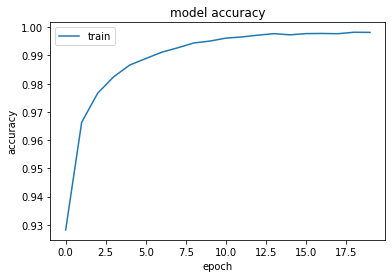

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

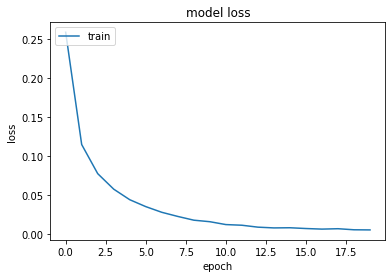

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

And the model predicts a label as expected.